https://platform.stratascratch.com/coding/10049-reviews-of-categories?code_type=3

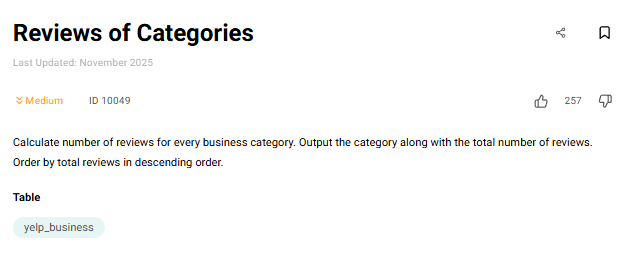
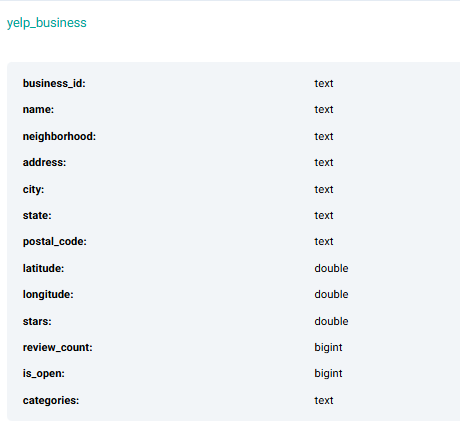

In [ ]:
SELECT * 
FROM yelp_business;

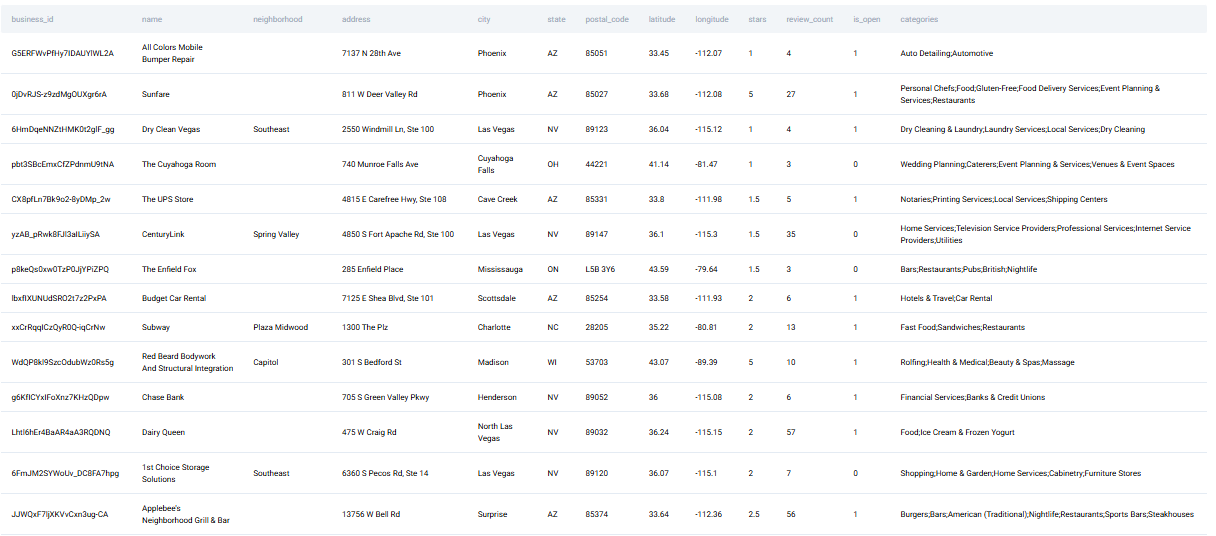

In [ ]:
WITH RECURSIVE categories_reviews AS (
    -- Start the recursivenes, get the first category

    SELECT 
        SUBSTRING_INDEX(categories,';',1) category,
        SUBSTRING(categories, LENGTH(SUBSTRING_INDEX(categories,';',1)) + 2) remaining_cats,
        1 interation_num
    FROM yelp_business

    UNION ALL

    -- get the recursivenes, get all the other categories
    SELECT
        SUBSTRING_INDEX(remaining_cats,';',1) category,
        CASE
            WHEN INSTR(remaining_cats,';') > 0 THEN SUBSTRING(remaining_cats,LENGTH(SUBSTRING_INDEX(remaining_cats,';',1))+2)
            ELSE ''
        END remaining_cats,
        interation_num + 1 AS interation_num 
    FROM categories_reviews
    WHERE 1=1
        AND remaining_cats != ''
        AND interation_num < 15
)
SELECT 
    *
FROM categories_reviews;

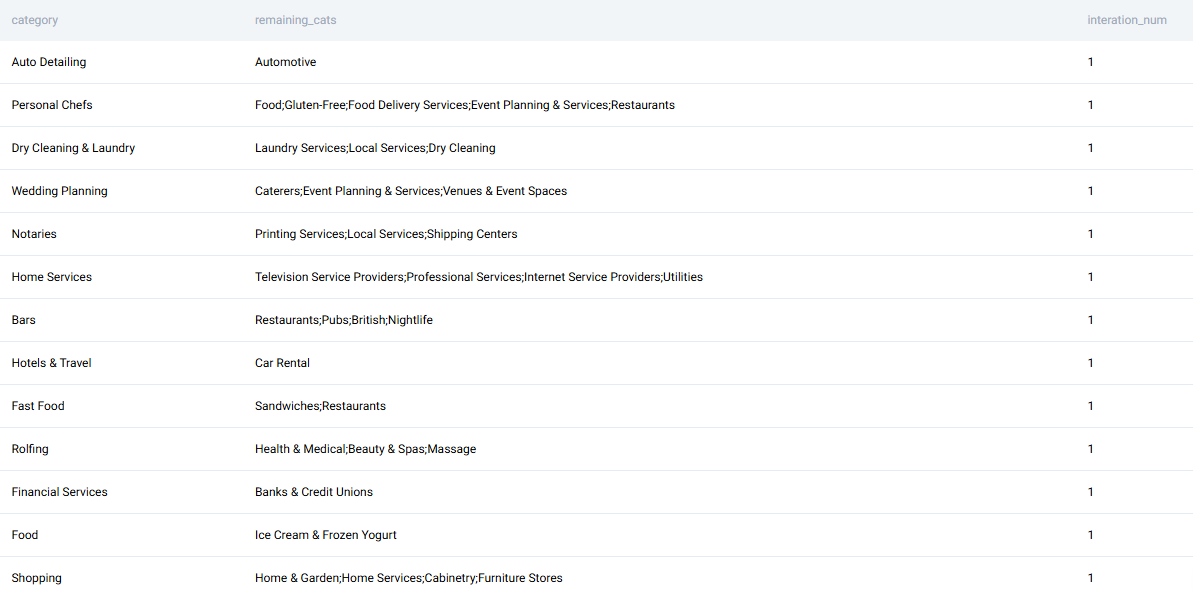

In [ ]:
WITH RECURSIVE categories_reviews AS (
    -- Start the recursivenes, get the first category

    SELECT 
        SUBSTRING_INDEX(categories,';',1) category,
        SUBSTRING(categories, LENGTH(SUBSTRING_INDEX(categories,';',1)) + 2) remaining_cats,
        review_count,
        1 interation_num
    FROM yelp_business

    UNION ALL

    -- get the recursivenes, get all the other categories
    SELECT
        SUBSTRING_INDEX(remaining_cats,';',1) category,
        CASE
            WHEN INSTR(remaining_cats,';') > 0 THEN SUBSTRING(remaining_cats,LENGTH(SUBSTRING_INDEX(remaining_cats,';',1))+2)
            ELSE ''
        END remaining_cats,
        review_count,
        interation_num + 1 AS interation_num 
    FROM categories_reviews
    WHERE 1=1
        AND remaining_cats != ''
        AND interation_num < 15
)
SELECT 
    category,
    SUM(review_count)
FROM categories_reviews
GROUP BY category
ORDER BY 2 DESC;

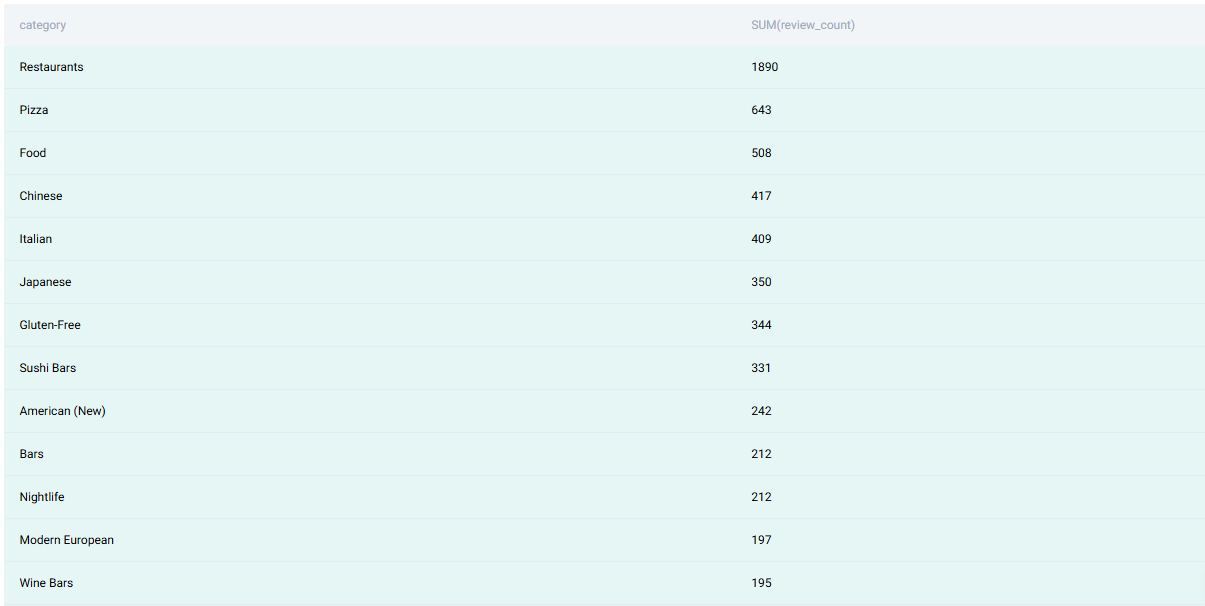